# Estudo de estatística com python

Estudos baseados no livro Estatística Básica de Wilton de O. Bussab e Pedro A. Morettin

Os dados utilizados se encontram em https://www.ime.usp.br/~pam/EstBas.html

## 1 - Importações de bibliotecas importantes para as análises

In [176]:
#Importação de bibliotecas
import pandas as pd
import sklearn as skl
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore")

## 2 - Resumo de Dados

### 2.1 - Tipos de Variáveis

Para esta parte utilizaremos a base de dados Tabela 2.1 que contém dados dos funcionarios de uma empresa

In [177]:
# Lendo a tabela 2.1 do arquivo CSV
df_tabela_2_1 = pd.read_csv(filepath_or_buffer="Tabela 2.1.csv",encoding='latin1',delimiter=';')
#Transformando a coluna Salario(x Sal Min) em tipo float
df_tabela_2_1['Salario (x Sal Min)'] = df_tabela_2_1['Salario (x Sal Min)'].str.replace(',','.')
df_tabela_2_1['Salario (x Sal Min)'] = df_tabela_2_1['Salario (x Sal Min)'].astype(float)


In [178]:
# 5 Primeiras 5 aparições da Tabela 2.1
df_tabela_2_1.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
0,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,casado,ensino fundamental,1.0,4.56,32,10,capital
2,casado,ensino fundamental,2.0,5.25,36,5,capital
3,solteiro,ensino médio,NaN,5.73,20,10,outra
4,solteiro,ensino fundamental,NaN,6.26,40,7,outra


Existem 7 variáveis no estudo.

-   Estado Civil -> Solteiro ou Casado

-   Grau de Instrução -> Ensino Fundamental, Ensino médio ou Ensino Superior

-   N de Filhos -> Quantidade de filhos

-   Salario(x Sal Min) -> Número de salários multiplicados pelo salário mínimo vigente

-   Anos -> Idade da pessoa em anos completos

-   Meses -> Idade da pessoa meses completos

-   Região de Procedência -> Interior, Capital ou outra

#### Tipos de variáveis

**Quantitativas** -> Apresentam possíveis realizações números resultantes de contagens ou mensurações. 

    Exemplos: Número de Filhos, Salário, Idade em anos e Meses.

**Qualitativas** -> Apresentam como possíveis realizações uma qualidade (ou atributo) do indivíduo pesquisado. 

    Exemplos: Estado Civil, Grau de instrução, Região de Procedência.

#### Variáveis Quantitativas


Variáveis quantitativas podem ser dividas em dois grupos

**Variáveis quantitativas discretas** -> Os valores formam um conjunto finito ou enumerável de números, que resultam frequentemente em uma contagem.

    Exemplos: Número de Filhos (1,2,3,...n), Idade completa em anos

**Variáveis quantitativas contínuas** -> Os valores pertencem a um intervalo de números reais e que resultam de uma mensuração.

    Exemplos: Salário, Idade medida em anos e meses

#### Variáveis Qualitativas

Variáveis qualitativas também se dividem em dois grupos

**Variáveis Qualitativas Nominais** -> Variáveis para qual não existe nenhum tipo de ordenação.

    Exemplo: Estado Civil, Região de procedência

**Variáveis Qualitativas Ordinais** -> Variáveis para qual existe uma ordem no seu resultado

    Exemplo: Grau de instrução (O mais baixo é o nível fundamental, médio, superior e assim por diante)

<center><img src="https://www.inf.ufsc.br/~andre.zibetti/probabilidade/img/classificacao_variaveis.png"/></center>

### 2.2 Distribuição de frequências

Quando se estuda uma variável, o maior interesse é conhecer o comportamento dessa variável, analisando a ocorrência de suas possíveis realizações.

In [179]:
#Frequência (absoluta) do Grau de instrução (n1)
df_tabela_2_1['Grau de Instrução'].value_counts()

ensino médio          18
ensino fundamental    12
superior               6
Name: Grau de Instrução, dtype: int64

In [180]:
#Proporção do grau de instrução ou frequência relativa (fi = n1/n)
df_tabela_2_1['Grau de Instrução'].value_counts()/df_tabela_2_1['Grau de Instrução'].count()

ensino médio          0.500000
ensino fundamental    0.333333
superior              0.166667
Name: Grau de Instrução, dtype: float64

In [181]:
#Proporção do grau de instrução em porcentagem ()
(df_tabela_2_1['Grau de Instrução'].value_counts()/df_tabela_2_1['Grau de Instrução'].count())*100

ensino médio          50.000000
ensino fundamental    33.333333
superior              16.666667
Name: Grau de Instrução, dtype: float64

Observando os resultados vê-se que dos 36 empregados da companhia 12 tem ensino fundamental, 18 médio e 6 superior.

Uma maneira útil de analisarmos esses dados é dividindo o valor de cada variável pelo total obtendo uma proporção em relação ao total da amostra.

Multiplicando por 100 temos o percentual relativo daquela variável.

### 2.3 Escala de medidas

Escalas de medidas são critérios para classificas variáveis, em função da escala adotada. Existem quatro escalas que podem ser consideradas

-   **Escala Nominal** -> Escala nominal permite apenas identificar se uma medida é diferente da outra, assemelha-se ao boolean ou relação binária. Exemplo, uma variável sexo onde existem Masculino ou Feminino sendo masculino 1 e feminino 0, ou M e F e assim por diante.

Medidas de posição apropriadas são: Moda
  
-   **Escala Ordinal** ->  De forma semelhante a Escala nominal definimos um número para a medida, porém, dessa vez a há uma ordenação na escala. Por exemplo o grau de instrução, onde 1 é o Ensino Fundamental, 2 o Ensino Médio e 3 o Ensino Superior. Dessa forma temos 3>2>1

Medidas de posição apropriadas são: Mediana e Moda

-   **Escala Intervalar** -> Nesta escala podemos afirmar que uma medida é igual ou diferente de outra, maior e o quanto maior que outra. Podemos quantificar a diferença da escala ordinal. É necessário uma origem arbitrária e uma unidade de medida. Exemplo, 0ºF é a origem e 1ºF é a unidade da escala de graus Fahrenheit. 0ºC não é igual a 0ºF. Para compararmos as duas medidas precisamos de uma transformação, no caso para transformar F em C é preciso usar a formula y=5/9(x-32)

Medidas de posição apropriadas são: Média, mediana e moda.  

-   **Escala Razão** -> Nesta escala semelhante a escala intervalar é possível comparar medidas, se são iguais, maiores, o quanto maiores e quantas vezes maior. A diferença principal é que a Escala razão possui um zero absoluto. Por exemplo, a unidade de medida da altura é o cm. Todas as alturas começam em 0 cm. Mesmo alterando a unidade para metros as equivalências e comparações permanecem.

Medidas de posição apropriadas são: Média, mediana e moda. 

### 2.4 Gráficos

#### 2.4.1 Gráficos para Variáveis Qualitativas

Para variáveis quantitativas há diversas formas de se representar o mesmo princípio.

Gráficos de barra (Bar plot)

<AxesSubplot:xlabel='Grau de Instrução', ylabel='count'>

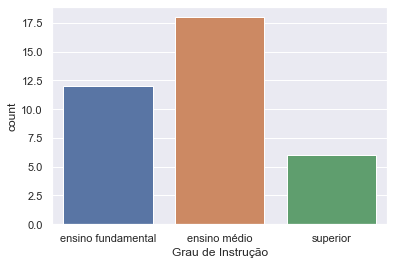

In [182]:
#Setando o estilo do tema do gráfico
sns.set_theme(style="darkgrid")
#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
sns.countplot(data = df_tabela_2_1, x = 'Grau de Instrução')

Gráfico de setores ou gráfico de pizza (Pie Chart)

([<matplotlib.patches.Wedge at 0x288a40ee8e0>,
 [Text(6.735557395310444e-17, 1.1, 'ensino médio'),
  Text(-0.5499999702695119, -0.9526279613277874, 'ensino fundamental'),
  Text(0.9526279870751432, -0.5499999256737775, 'superior')])

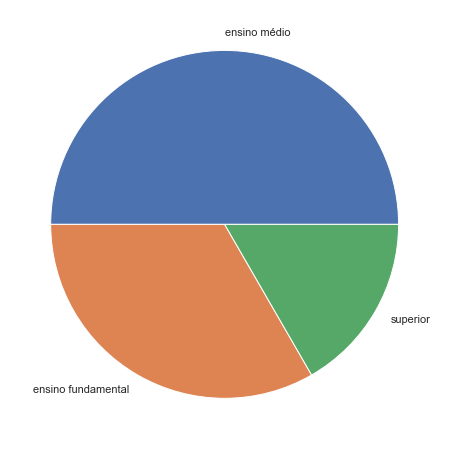

In [183]:
#Setando o estilo do tema do gráfico
sns.set_theme(style="darkgrid")

df_count_grau_instrucao = df_tabela_2_1['Grau de Instrução'].value_counts().to_frame().reset_index()

#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
plt.figure(figsize=(12,8))
plt.pie(x = df_count_grau_instrucao['Grau de Instrução'],labels=df_count_grau_instrucao['index'])


#doc: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

#### 2.4.1 Gráfico para variáveis quantitativas

Para variáveis quantitativas, podemos considerar uma variade maior de representações gráficas

Gráfico de barras

<AxesSubplot:xlabel='N de Filhos', ylabel='count'>

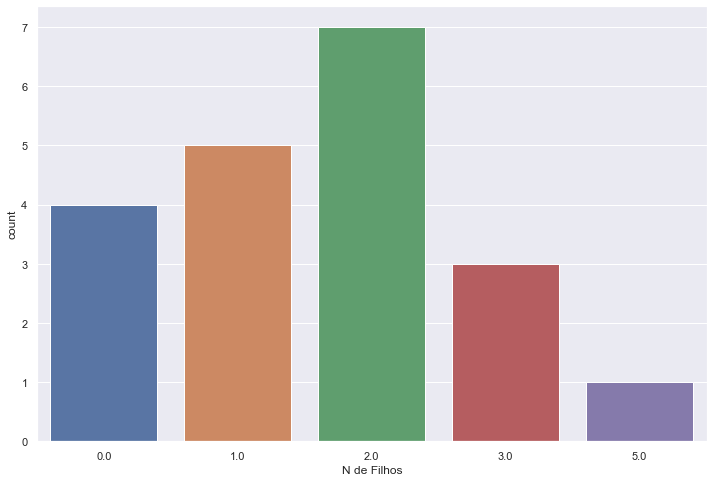

In [184]:
# Gráfico de barras para variável quantitativa discreta
sns.set_theme(style="darkgrid")
#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
plt.figure(figsize=(12,8))
sns.countplot(data = df_tabela_2_1, x = 'N de Filhos')

Gráfico de dispersão unidimensional

<AxesSubplot:ylabel='N de Filhos'>

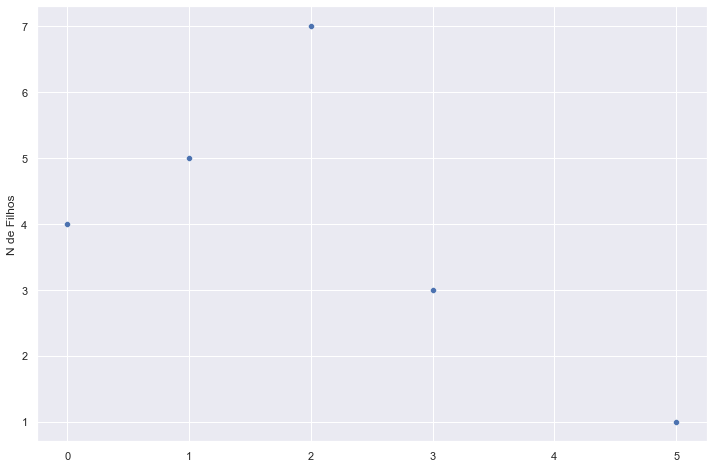

In [185]:
# Gráfico de dispersão unidimensional plotando apenas o valor máximo de cada variável
sns.set_theme(style="darkgrid")
#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
plt.figure(figsize=(12,8))
sns.scatterplot(x = df_tabela_2_1['N de Filhos'].value_counts().index, y = df_tabela_2_1['N de Filhos'].value_counts())

Histograma

<AxesSubplot:xlabel='Classe de Salários', ylabel='Count'>

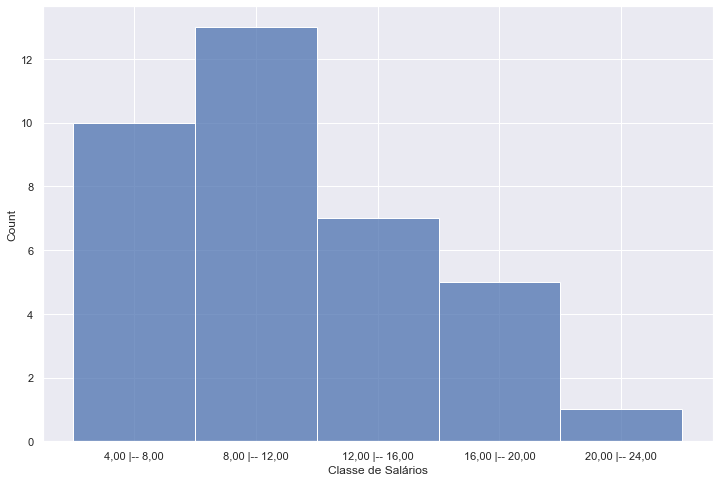

In [186]:
#Criando uma classe para os salarios com amplitude de 4
df_tabela_2_1['Classe de Salários'] = pd.cut(x =df_tabela_2_1['Salario (x Sal Min)'], bins = [4,8,12,16,20,24], labels = ['4,00 |-- 8,00','8,00 |-- 12,00','12,00 |-- 16,00','16,00 |-- 20,00','20,00 |-- 24,00'],include_lowest = True)
#Gráfico para variável quantitativa contínua
plt.figure(figsize=(12,8))
sns.histplot(data = df_tabela_2_1, x = 'Classe de Salários')

## 3 - Medidas-Resumo

### 3.1 - Medidas de Posição

Muitas vezes é necessário resumir os dados, apresentando um ou alguns valores que sejam representativos da série toda.
Usualmente, emprega-se uma das seguintes medidas de posição (ou localização) central:

    - Média
    - Mediana
    - Moda

- **Moda** -> É definida como a realização mais frquente do conjunto de valores observados. Por exemplo, considere a variável Z, número de filhos de cada funcionário casado, resumida no df_tabela_2_1. Vemos que a moda é 2, correspondente a realização com maior frequência (aparece 7 vezes). Em alguns casos, pode haver mais de uma moda, ou seja, a distribuição dos valores pode ser bimodal,trimodal,etc.

In [187]:
#Agrupando os valores da coluna Estado Civil e agregando os valores da coluna N de Filhos pela moda
print(f"A moda da variável filhos para as pessoas de estado civil casado é: {df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].agg(pd.Series.mode)[0]}")
print(f"A frequência de vezes que esse valor aparece é de : {df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].value_counts().max()}")

A moda da variável filhos para as pessoas de estado civil casado é: 2.0
A frequência de vezes que esse valor aparece é de : 7


- **Mediana** -> É a realização que ocupa a posição central das observações, quando estão ordenadas em ordem crescente. Assim, se as cinco observações de uma variável forem 3, 4,7, 8 e 8, a mediana é o valor 7, correspondente à terceira observação. Quando o número de observações for par, usa-se como mediana a média aritmética das duas observações centrais. Acrescentando-se o valor 9 a série acima, a mediana será (7 + 8)/2 = 7,5

Para os valores de filhos das pessoas casadas do df_tabela_2_1 a mediana também é 2.

In [188]:
#Agrupando os valores da coluna Estado Civil e agregando os valores da coluna N de Filhos pela mediana
print(f"A mediana da variável filhos para as pessoas de estado civil casado é: {df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].agg(pd.Series.median)[0]}")

A mediana da variável filhos para as pessoas de estado civil casado é: 2.0
